In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
data= pd.read_csv('Amazon Sales data.csv')
plt.show()

In [6]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [7]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

In [8]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [9]:
data.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [10]:
data = data.astype({'Ship Date':'datetime64[ns]','Order Date':'datetime64[ns]'})

In [11]:
data.dtypes

Region                    object
Country                   object
Item Type                 object
Sales Channel             object
Order Priority            object
Order Date        datetime64[ns]
Order ID                   int64
Ship Date         datetime64[ns]
Units Sold                 int64
Unit Price               float64
Unit Cost                float64
Total Revenue            float64
Total Cost               float64
Total Profit             float64
dtype: object

<Axes: >

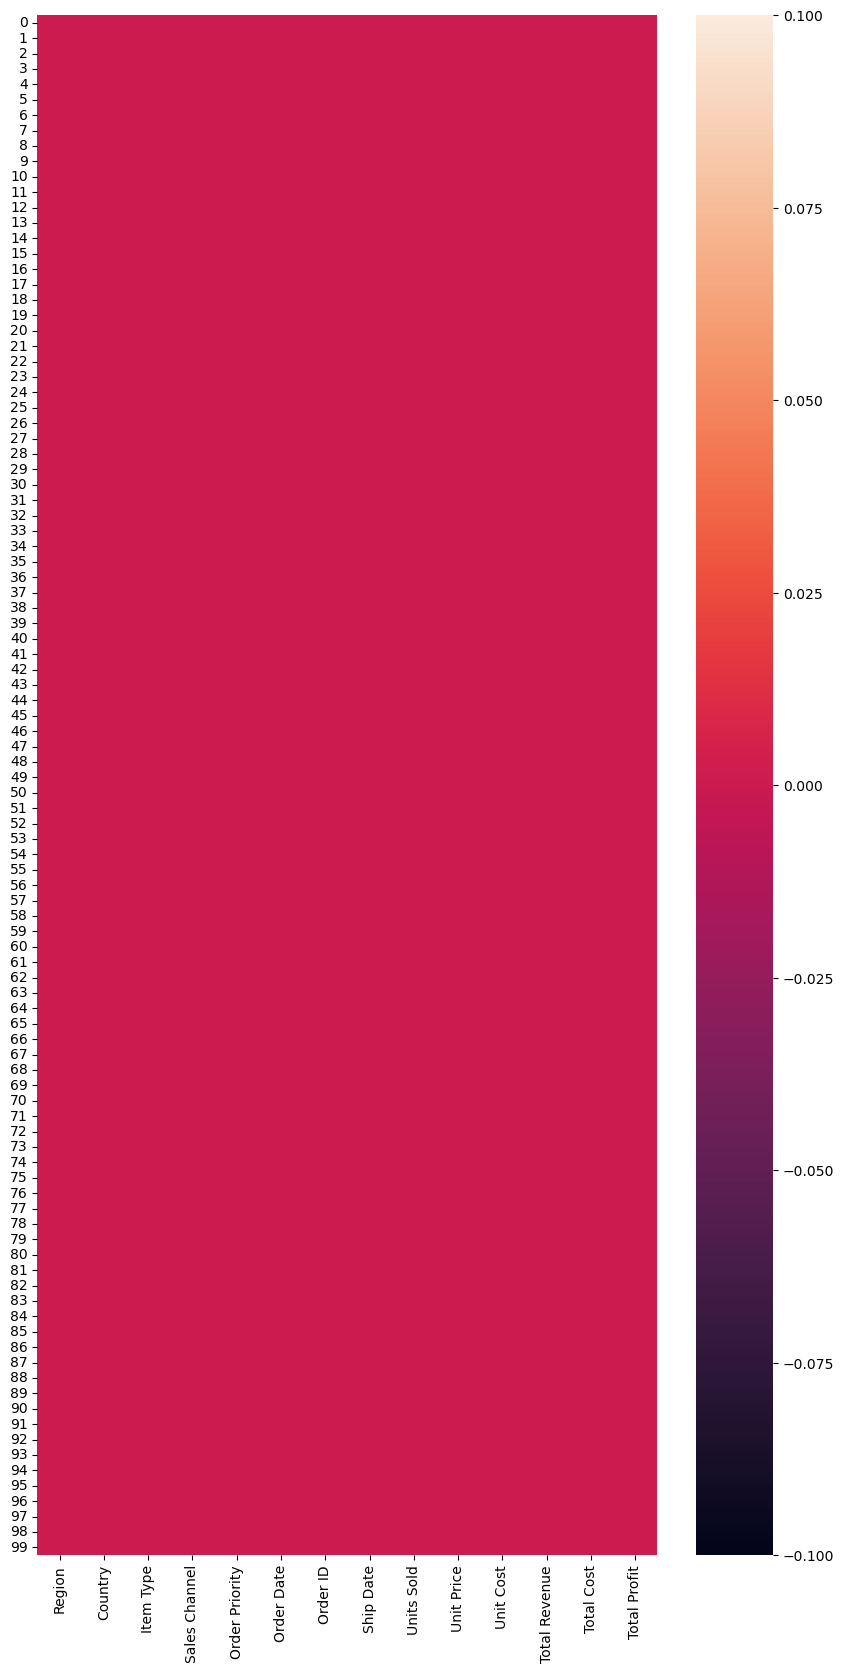

In [12]:
plt.figure(figsize=(10,20))
sns.heatmap(data.isnull())

In [13]:
test=data.iloc[0,12]=np.nan
test

nan

<Axes: >

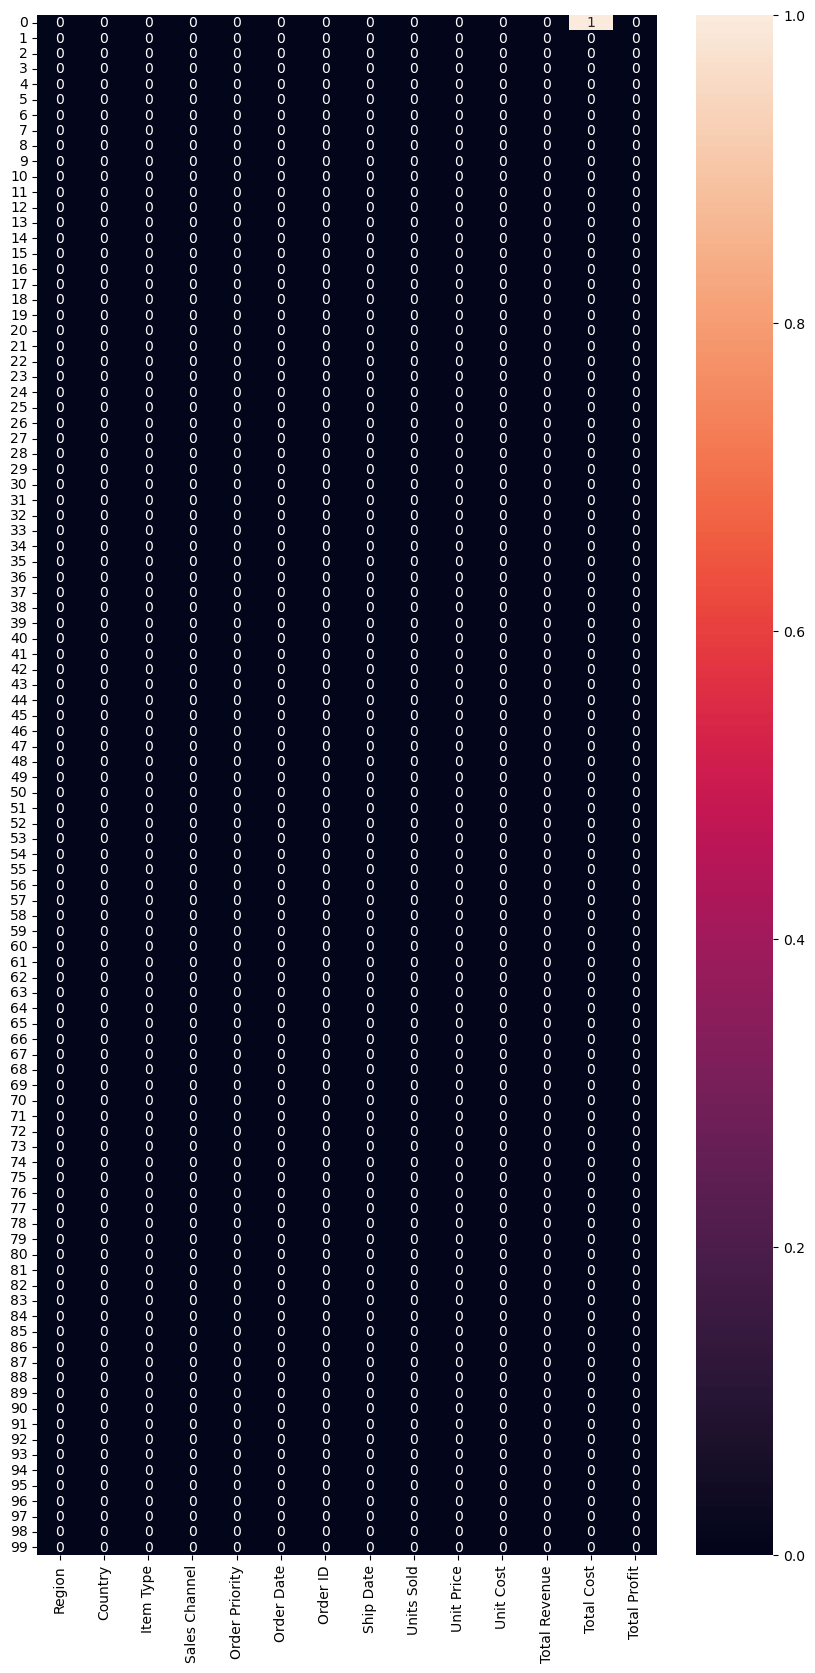

In [14]:
plt.figure(figsize=(10,20))
sns.heatmap(data.isnull(),annot=True)

In [15]:
data.head(3)

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,NaN,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75


In [17]:
Highest_Total_Revenue= data.groupby(data['Region'])['Total Revenue'].sum()
Highest_Total_Revenue.idxmax()


'Sub-Saharan Africa'

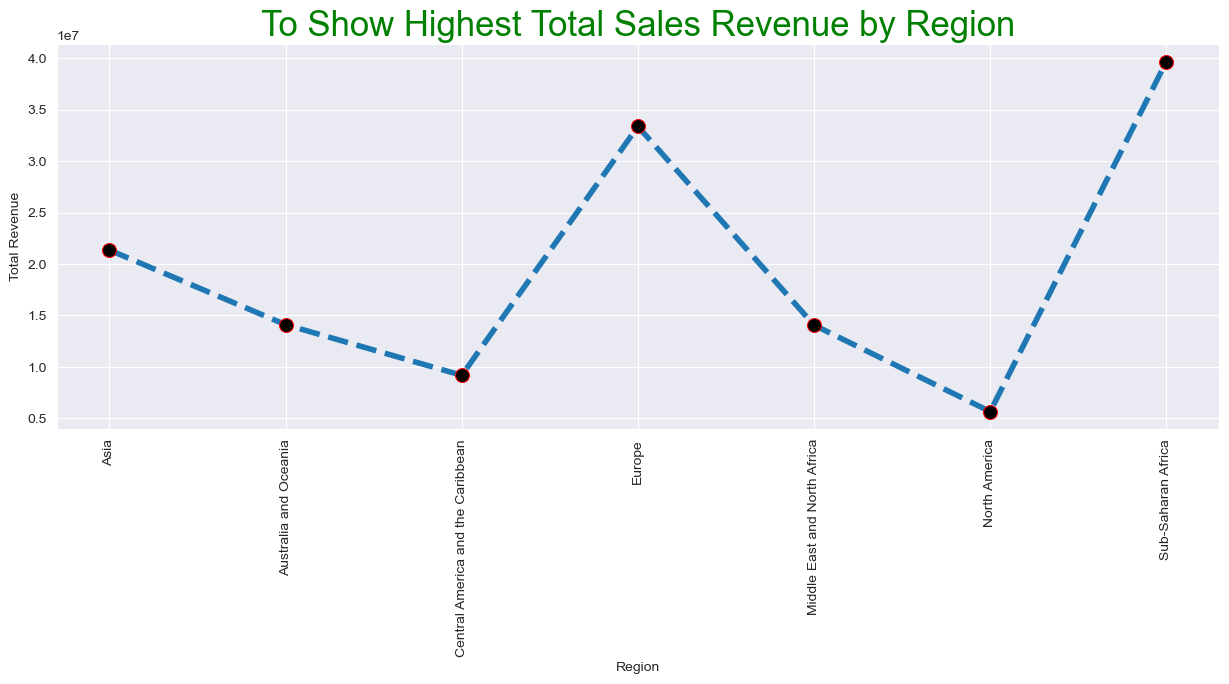

In [21]:

sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
sns.lineplot(data=group_data, linestyle='--', linewidth=4, marker='o', 
             markersize=10, markerfacecolor='Black', markeredgecolor='Red')
plt.xticks(rotation=90)
plt.title('To Show Highest Total Sales Revenue by Region', fontsize=25, color='Green')
plt.show()

C:\Users\91991\AppData\Local\Temp\ipykernel_11900\3690001749.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=group_data.index,y=group_data, palette='viridis')


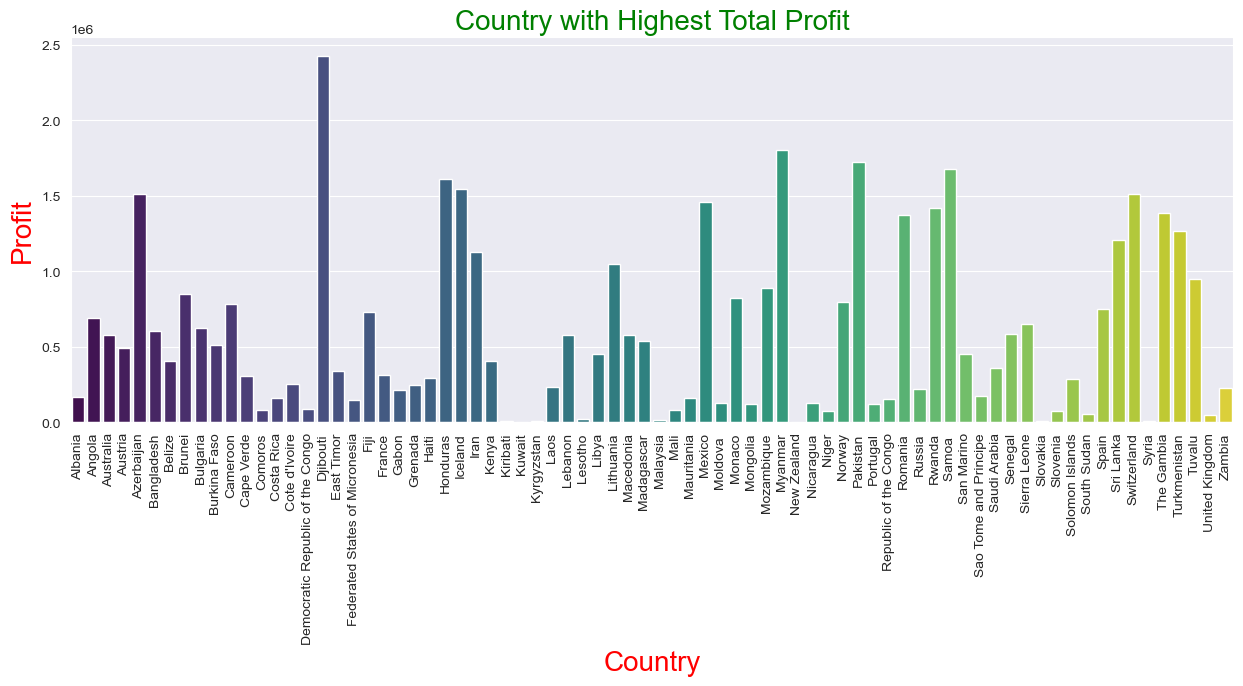

In [23]:
group_data= data.groupby(data['Country'])['Total Profit'].sum()
sns.set_style('darkgrid')
plt.figure(figsize=(15, 5))
sns.barplot(x=group_data.index,y=group_data, palette='viridis') 
plt.xticks(rotation=90)
plt.title('Country with Highest Total Profit', fontsize=20, color='Green')
plt.xlabel('Country', fontsize=20, color='red')
plt.ylabel('Profit', fontsize=20, color='red')
plt.show()

In [28]:
q1=data['Total Cost'].quantile(0.25)
q3=data['Total Cost'].quantile(0.75)

iqr=q3-q1
lower_fence= q1-1.5*iqr
upper_fence= q3+1.5*iqr

outliers= data[(data['Total Cost']<lower_fence)|(data['Total Cost']>upper_fence)].reset_index(drop=True)
outliers


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Central America and the Caribbean,Honduras,Household,Offline,H,2017-02-08,522840487,2017-02-13,8974,668.27,502.54,5997054.98,4509793.96,1487261.02
1,Asia,Myanmar,Household,Offline,H,2015-01-16,177713572,2015-03-01,8250,668.27,502.54,5513227.50,4145955.00,1367272.50
2,Europe,Lithuania,Office Supplies,Offline,H,2010-10-24,166460740,2010-11-17,8287,651.21,524.96,5396577.27,4350343.52,1046233.75


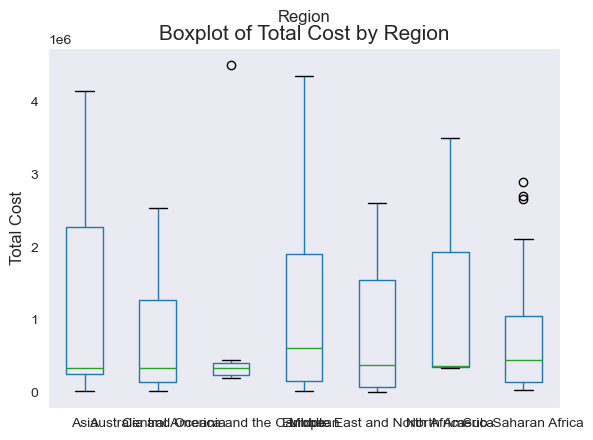

In [41]:
data.boxplot(column='Total Cost', by='Region', grid=False)

plt.title('Boxplot of Total Cost by Region', fontsize=15)
plt.suptitle('Region') 
plt.xlabel('', fontsize=12)
plt.ylabel('Total Cost', fontsize=12)
data.head(1)
plt.show()
